In [1]:
from model import Gmail
import matplotlib.pyplot as plt
import numpy as np
import random
from shingles import nShingles

G = Gmail()

In [2]:
oit = G.get('OIT')
len(oit)

44

In [12]:
K = nShingles(8, 2)

In [20]:
scores = {}
for m in oit:
    content = G.parse(m)
    group, score = K.add(content)
    if group in scores:
        scores[group].append(score)
    else:
        scores[group] = [score]
    print(group, content[:100])

Closing testOffice of Information TechnologyLST Student AV Support ClosingMon Jul 01 2019 18:54:22 GMT-0600 
1 Hey guys,This is a reminder that we will not be working this Thursday for the 4th of July. There wil
Closing testOffice of Information TechnologyLST Student AV Support ClosingThu Jun 27 2019 18:58:48 GMT-0600 
1 Hi All,I will be out of the office tomorrow and Friday. If you need something immediately, please re
1 Hey guys I had late games last night and I slept through my alarms and amrunning late. Im leaving im
1 Hi Oriana,I'd like to RSVP for this event. I don't have a calendar invite, sohopefully a reply suffi
1 A Message from Jennie Brucker, Director of Employee and Customer EngagementThe Employee Empowerment/
Closing testOffice of Information TechnologyLST Student AV Support ClosingTue Jun 11 2019 18:54:48 GMT-0600 
1      ReadMsgBody   .ExternalClass    .ExternalClass, .ExternalClass p, .ExternalClass span, .Externa
Closing testOffice of Information TechnologyLST Student

In [21]:
K.name(0,'Closing')
K.name(1,'Other')

Closing 28
1 16


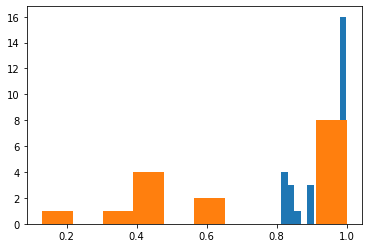

In [22]:
for x in scores:
    print(x, len(scores[x]))
    plt.hist(scores[x])

In [23]:
print(K.size())
print(K.n())

{'Closing': 5289, 'Other': 16694}
{'Closing': 112, 'Other': 64}


In [24]:
inbox = G.get('INBOX')
random.shuffle(inbox)
len(inbox)

5015

In [26]:
for m in inbox[:100]:
    content = G.parse(m)
    group, score = K.sim(content)
    if score > .5 and group == 'Other':
        print(group, round(score, 4), content[:50])
        K.add(content)
#         G.setLabel(m, 'OIT')

Other 0.5435 Denee JandaDo you want to declare or change a majo
Other 0.9574   To view this email as a web page, go to the link
Other 0.5778 ________________________________From: UCB ServiceN
Other 0.9362 Hey guys my brother’s truck wouldn’t start so I ha
Other 0.617 ________________________________From: UCB ServiceN
Other 0.9362 Hey guys I was feeling pretty sick this weekend an
Other 0.5745 Dear Hideo, We have an update on your issue INC048
Other 0.5532 Department of Applied MathematicsColloquium and Se
Other 0.9556 Hey Hideo.  This room is currently in use by a stu
Other 0.587 To view this email as a web page, go to the link b
Other 0.9565 *INC0491098 CASE E250 - Guido has responded to the


In [ ]:
K.groups()

In [ ]:
for m in inbox[100:200]:
    content = G.parse(m)
    group, score = K.sim(content)
    if score > .5:
        print(group, round(score, 4), content[:50])
        K.add(content)
        G.setLabel(m, 'OIT')